<a href="https://colab.research.google.com/github/javad-sheikh/Recurrent_Networks/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
tf.__version__

'2.3.0'

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import os
import datetime
%load_ext tensorboard

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/My Drive/ANN/HW5_RNN/Tamin.Petro..csv"
rawdata = pd.read_csv(path)
Train = rawdata.iloc[22:]['<CLOSE>']
Test = rawdata.iloc[:22]['<CLOSE>']
Test = np.flip(Test)
Train = np.flip(Train)
Test = np.asarray(Test)
Train = np.asarray(Train)
out_dim = len(Test)
in_dim =100

22

In [ ]:
x_Train = []
y_Train = []
for i in range(len(Train)-121):
    x_Train.append(Train[i:i+100])
    y_Train.append(Train[i+100:i+122])

In [ ]:
x_Test = np.asarray(Train[-100:])
y_Test = np.asarray(Test)

In [ ]:
x_Train = np.asarray(x_Train)
y_Train = np.asarray(y_Train)

# Jordan :

In [ ]:
tf.keras.backend.clear_session()
class Jordan(keras.Model):
   
    def __init__(self):
        super(Jordan,self).__init__()
        self.feedback = tf.Variable(tf.reshape(tf.zeros(out_dim),(-1,out_dim),name="feedback"))


    def build(self,_):
        self.l1 = keras.layers.Dense(32, dtype=tf.float32,activation="relu")
        self.l2 = keras.layers.Dense(16, dtype=tf.float32,activation="relu")
        self.out = keras.layers.Dense(out_dim, dtype=tf.float32,activation="relu")
    
    def call(self, inputs):
        x1 = keras.layers.concatenate([self.feedback,tf.reshape(inputs,[-1,in_dim])])
        x2 = self.l1(x1)
        x3 = self.l2(x2)
        my_output = self.out(x3)
        self.feedback.assign(my_output)
        return my_output

predictions are :
 [[3899.5527 3935.1553 3968.8564 3982.1375 3982.239  3983.7168 3987.242
  3975.652  3962.8435 3970.888  3967.922  3962.4905 3961.2275 3962.2815
  3938.1328 3917.0918 3914.371  3892.883  3896.4746    0.     3904.256
  3912.885 ]]
real values are :
 [3872. 4036. 3979. 4009. 3993. 3986. 3951. 3996. 3798. 3793. 3756. 3709.
 3783. 3972. 4166. 4173. 4225. 4313. 4311. 4302. 4310. 4283.]


Text(0, 0.5, 'value')

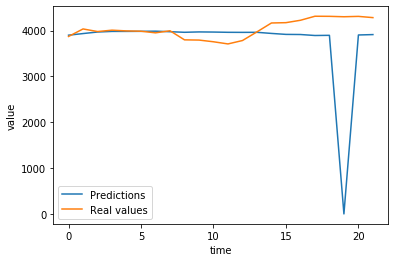

In [ ]:
jordan = Jordan()

jordan.compile(optimizer="adam", loss="mse")

logdir = os.path.join("logs1", "mse")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

jordan.fit(x_Train, y_Train, epochs=100,batch_size=1,callbacks=[tensorboard_callback])

t = np.arange(22)
pred = jordan.predict(np.reshape(x_Test,[-1,in_dim]))
print("predictions are :\n",pred)
print("real values are :\n",y_Test)
import matplotlib.pyplot as plt

plt.plot(t,np.reshape(pred,[22,-1]))
plt.plot(t,np.reshape(y_Test,[22,-1]))
plt.legend(labels=["Predictions","Real values"])
plt.xlabel("time")
plt.ylabel("value")

In [ ]:
jordan.compile(optimizer="adam", loss="mae")

logdir = os.path.join("logs1", "mae")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

jordan.fit(x_Train, y_Train, epochs=100,batch_size=1,callbacks=[tensorboard_callback])

t = np.arange(22)
pred = jordan.predict(np.reshape(x_Test,[-1,in_dim]))
print("predictions are :\n",pred)
print("real values are :\n",y_Test)
import matplotlib.pyplot as plt

plt.plot(t,np.reshape(pred,[22,-1]))
plt.plot(t,np.reshape(y_Test,[22,-1]))
plt.legend(labels=["Predictions","Real values"])
plt.xlabel("time")
plt.ylabel("value")


Train on 1296 samples
Epoch 1/100
1296/1296 [==============================] - 4s 3ms/sample - loss: 263.6439
Epoch 2/100
1296/1296 [==============================] - 3s 3ms/sample - loss: 260.8615
Epoch 3/100
1296/1296 [==============================] - 3s 3ms/sample - loss: 266.7558
Epoch 4/100
1296/1296 [==============================] - 3s 3ms/sample - loss: 259.3491
Epoch 5/100
1296/1296 [==============================] - 4s 3ms/sample - loss: 264.7928
Epoch 6/100
1296/1296 [==============================] - 4s 3ms/sample - loss: 260.1362
Epoch 7/100
1296/1296 [==============================] - 4s 3ms/sample - loss: 263.0362
Epoch 8/100
1296/1296 [==============================] - 4s 3ms/sample - loss: 259.5296
Epoch 9/100
1296/1296 [==============================] - 3s 3ms/sample - loss: 263.4748
Epoch 10/100
1296/1296 [==============================] - 4s 3ms/sample - loss: 261.6106
Epoch 11/100
1296/1296 [==============================] - 3s 3ms/sample - loss: 262.7438
Epoch 12

In [ ]:
%tensorboard --logdir logs1


# Elman :


In [ ]:
tf.keras.backend.clear_session()
class Elman(keras.Model):
   
    def __init__(self):
        super(Elman,self).__init__()
        self.feedback = tf.Variable(tf.reshape(tf.zeros(32),(-1,32),name="feedback"))


    def build(self,_):
        self.l1 = keras.layers.Dense(32, dtype=tf.float32,activation="relu")
        self.l2 = keras.layers.Dense(64, dtype=tf.float32,activation="relu")
        self.l3 = keras.layers.Dense(32, dtype=tf.float32,activation="relu")
        self.myout = keras.layers.Dense(out_dim, dtype=tf.float32, activation="relu")
    def call(self, inputs):
        x1 = keras.layers.concatenate([self.feedback,tf.reshape(inputs,[-1,in_dim])])
        x2 = self.l1(x1)
        x3 = self.l2(x2)
        x4 = self.l3(x3)
        self.feedback.assign(x4)
        my_out = self.myout(x4)
        return my_out

In [ ]:
elman = Elman()

elman.compile(optimizer="adam", loss="mse")

logdir = os.path.join("logs2", "mse")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

elman.fit(x_Train, y_Train, epochs=100,batch_size=1,callbacks=[tensorboard_callback])

t = np.arange(22)
pred = elman.predict(np.reshape(x_Test,[-1,in_dim]))
print("predictions are :\n",pred)
print("real values are :\n",y_Test)
import matplotlib.pyplot as plt

plt.plot(t,np.reshape(pred,[22,-1]))
plt.plot(t,np.reshape(y_Test,[22,-1]))
plt.legend(labels=["Predictions","Real values"])
plt.xlabel("time")
plt.ylabel("value")

In [ ]:
elman.compile(optimizer="adam", loss="mae")

logdir = os.path.join("logs2", "mae")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

elman.fit(x_Train, y_Train, epochs=100,batch_size=1,callbacks=[tensorboard_callback])

t = np.arange(22)
pred = elman.predict(np.reshape(x_Test,[-1,in_dim]))
print("predictions are :\n",pred)
print("real values are :\n",y_Test)
import matplotlib.pyplot as plt

plt.plot(t,np.reshape(pred,[22,-1]))
plt.plot(t,np.reshape(y_Test,[22,-1]))
plt.legend(labels=["Predictions","Real values"])
plt.xlabel("time")
plt.ylabel("value")

In [ ]:
%tensorboard --logdir logs2

# RMLP

In [ ]:
class R_layer(keras.layers.Layer):
    def __init__(self, input_dim):
        super(R_layer, self).__init__()
        self.input_dim = input_dim

    def build(self, input_shape):
        self.feed = tf.Variable(tf.reshape(tf.zeros(self.input_dim),(-1,self.input_dim),name="feedback"))
        self.den = keras.layers.Dense(self.input_dim)

    def call(self,inputs):
        x = keras.layers.concatenate([self.feed,inputs])
        x = self.den(x)
        self.feed.assign(x)
        return x

In [ ]:
RMLP = keras.models.Sequential([keras.Input((in_dim,)),R_layer(input_dim=64),R_layer(input_dim=32),R_layer(input_dim=out_dim)])

RMLP.compile(optimizer="adam", loss="mse")

logdir = os.path.join("logs3", "mse")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir)

RMLP.fit(x_Train, y_Train, epochs=100,batch_size=1,callbacks=[tensorboard_callback])

t = np.arange(22)
pred = RMLP.predict(np.reshape(x_Test,[-1,in_dim]))
print("predictions are :\n",pred)
print("real values are :\n",y_Test)
import matplotlib.pyplot as plt

plt.plot(t,np.reshape(pred,[22,-1]))
plt.plot(t,np.reshape(y_Test,[22,-1]))
plt.legend(labels=["Predictions","Real values"])
plt.xlabel("time")
plt.ylabel("value")

In [ ]:
RMLP = keras.models.Sequential([keras.Input((in_dim,)),R_layer(input_dim=64),R_layer(input_dim=32),R_layer(input_dim=out_dim)])

RMLP.compile(optimizer="adam", loss="mae")

logdir = os.path.join("logs3", "mae")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir)

RMLP.fit(x_Train, y_Train, epochs=100,batch_size=1,callbacks=[tensorboard_callback])

t = np.arange(22)
pred = RMLP.predict(np.reshape(x_Test,[-1,in_dim]))
print("predictions are :\n",pred)
print("real values are :\n",y_Test)
import matplotlib.pyplot as plt

plt.plot(t,np.reshape(pred,[22,-1]))
plt.plot(t,np.reshape(y_Test,[22,-1]))
plt.legend(labels=["Predictions","Real values"])
plt.xlabel("time")
plt.ylabel("value")

In [ ]:
%tensorboard --logdir logs3

Train on 1296 samples
Epoch 1/100
1296/1296 [==============================] - 5s 4ms/sample - loss: 1407.2486
Epoch 2/100
1296/1296 [==============================] - 4s 3ms/sample - loss: 394.8156
Epoch 3/100
1296/1296 [==============================] - 4s 3ms/sample - loss: 338.3590
Epoch 4/100
1296/1296 [==============================] - 4s 3ms/sample - loss: 301.4389
Epoch 5/100
1296/1296 [==============================] - 4s 3ms/sample - loss: 303.6049
Epoch 6/100
1296/1296 [==============================] - 4s 3ms/sample - loss: 287.2646
Epoch 7/100
1296/1296 [==============================] - 4s 3ms/sample - loss: 272.7872
Epoch 8/100
1296/1296 [==============================] - 4s 3ms/sample - loss: 263.3647
Epoch 9/100
1296/1296 [==============================] - 4s 3ms/sample - loss: 261.2614
Epoch 10/100
1296/1296 [==============================] - 4s 3ms/sample - loss: 250.7636
Epoch 11/100
1296/1296 [==============================] - 4s 3ms/sample - loss: 250.4401
Epoch 1

Text(0, 0.5, 'value')

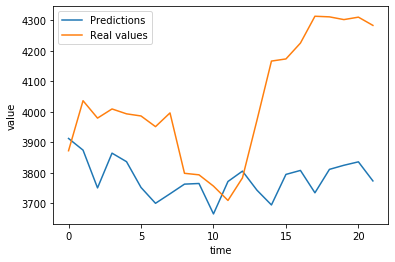

In [ ]:
RMLP = keras.models.Sequential([keras.Input((in_dim,)),R_layer(input_dim=64),R_layer(input_dim=32),
                                R_layer(input_dim=32),R_layer(input_dim=out_dim)])

RMLP.compile(optimizer="adam", loss="mae")

logdir = os.path.join("logs3", "mae")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir)

RMLP.fit(x_Train, y_Train, epochs=100,batch_size=1,callbacks=[tensorboard_callback])

t = np.arange(22)
pred = RMLP.predict(np.reshape(x_Test,[-1,in_dim]))
print("predictions are :\n",pred)
print("real values are :\n",y_Test)
import matplotlib.pyplot as plt

plt.plot(t,np.reshape(pred,[22,-1]))
plt.plot(t,np.reshape(y_Test,[22,-1]))
plt.legend(labels=["Predictions","Real values"])
plt.xlabel("time")
plt.ylabel("value")

Train on 1296 samples
Epoch 1/100
1296/1296 [==============================] - 4s 3ms/sample - loss: 729.8698
Epoch 2/100
1296/1296 [==============================] - 4s 3ms/sample - loss: 364.5402
Epoch 3/100
1296/1296 [==============================] - 4s 3ms/sample - loss: 301.2914
Epoch 4/100
1296/1296 [==============================] - 4s 3ms/sample - loss: 273.9487
Epoch 5/100
1296/1296 [==============================] - 4s 3ms/sample - loss: 257.7273
Epoch 6/100
1296/1296 [==============================] - 4s 3ms/sample - loss: 256.5853
Epoch 7/100
1296/1296 [==============================] - 4s 3ms/sample - loss: 240.9985
Epoch 8/100
1296/1296 [==============================] - 4s 3ms/sample - loss: 243.7269
Epoch 9/100
1296/1296 [==============================] - 4s 3ms/sample - loss: 234.2866
Epoch 10/100
1296/1296 [==============================] - 4s 3ms/sample - loss: 223.6848
Epoch 11/100
1296/1296 [==============================] - 4s 3ms/sample - loss: 229.2727
Epoch 12

Text(0, 0.5, 'value')

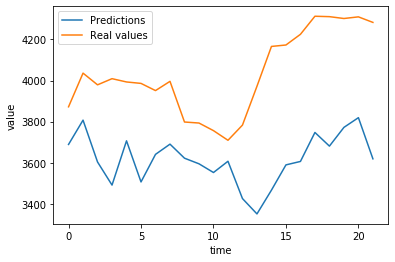

In [ ]:
RMLP = keras.models.Sequential([keras.Input((in_dim,)),R_layer(input_dim=64),R_layer(input_dim=out_dim)])

RMLP.compile(optimizer="adam", loss="mae")

logdir = os.path.join("logs3", "mae")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir)

RMLP.fit(x_Train, y_Train, epochs=100,batch_size=1,callbacks=[tensorboard_callback])

t = np.arange(22)
pred = RMLP.predict(np.reshape(x_Test,[-1,in_dim]))
print("predictions are :\n",pred)
print("real values are :\n",y_Test)
import matplotlib.pyplot as plt

plt.plot(t,np.reshape(pred,[22,-1]))
plt.plot(t,np.reshape(y_Test,[22,-1]))
plt.legend(labels=["Predictions","Real values"])
plt.xlabel("time")
plt.ylabel("value")

Train on 1296 samples
Epoch 1/15
1296/1296 [==============================] - 5s 4ms/sample - loss: 3509.4441
Epoch 2/15
1296/1296 [==============================] - 5s 4ms/sample - loss: 670.4202
Epoch 3/15
1296/1296 [==============================] - 5s 4ms/sample - loss: 500.3208
Epoch 4/15
1296/1296 [==============================] - 5s 4ms/sample - loss: 429.9228
Epoch 5/15
1296/1296 [==============================] - 5s 4ms/sample - loss: 388.3839
Epoch 6/15
1296/1296 [==============================] - 4s 3ms/sample - loss: 384.7294
Epoch 7/15
1296/1296 [==============================] - 5s 3ms/sample - loss: 353.1345
Epoch 8/15
1296/1296 [==============================] - 5s 4ms/sample - loss: 343.8952
Epoch 9/15
1296/1296 [==============================] - 5s 3ms/sample - loss: 349.1155
Epoch 10/15
1296/1296 [==============================] - 4s 3ms/sample - loss: 371.5883
Epoch 11/15
1296/1296 [==============================] - 4s 3ms/sample - loss: 303.9675
Epoch 12/15
1296/1

Text(0, 0.5, 'value')

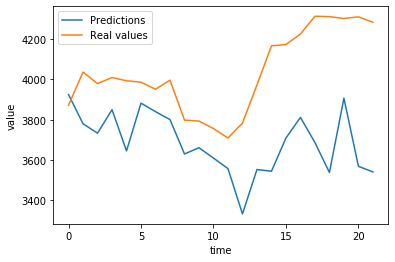

In [ ]:
RMLP = keras.models.Sequential([keras.Input((in_dim,)),R_layer(input_dim=128),R_layer(input_dim=100),
                                R_layer(input_dim=80),R_layer(input_dim=60),R_layer(input_dim=40),R_layer(input_dim=out_dim)])

RMLP.compile(optimizer="adam", loss="mae")

logdir = os.path.join("logs3", "mae")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir)

RMLP.fit(x_Train, y_Train, epochs=15,batch_size=1,callbacks=[tensorboard_callback])

t = np.arange(22)
pred = RMLP.predict(np.reshape(x_Test,[-1,in_dim]))
print("predictions are :\n",pred)
print("real values are :\n",y_Test)
import matplotlib.pyplot as plt

plt.plot(t,np.reshape(pred,[22,-1]))
plt.plot(t,np.reshape(y_Test,[22,-1]))
plt.legend(labels=["Predictions","Real values"])
plt.xlabel("time")
plt.ylabel("value")

# Gharb Cement

In [ ]:
path = "/content/drive/My Drive/HW5_RNN/Gharb.Cement..csv"
rawdata = pd.read_csv(path)
Test = rawdata.iloc[:rawdata.loc[rawdata["<DTYYYYMMDD>"]==20191222].index[0]+1]['<CLOSE>']
Train = rawdata.iloc[rawdata.loc[rawdata["<DTYYYYMMDD>"]==20191222].index[0]+1:]['<CLOSE>']

x_Train=np.asarray(Train.iloc[:Train.size-1])
y_Train=np.asarray(Train.iloc[1:])

logdir = os.path.join("Gharb Cement", "Jordan")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

jordan.fit(x_Train, y_Train, epochs=20,batch_size=1,callbacks=[tensorboard_callback])

logdir = os.path.join("Gharb Cement", "Elman")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

elman.fit(x_Train, y_Train, epochs=20,batch_size=1,callbacks=[tensorboard_callback])

logdir = os.path.join("Gharb Cement", "RMLP")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir)

RMLP.fit(x_Train, y_Train, epochs=20,batch_size=1,callbacks=[tensorboard_callback])

# I..N..C..Ind.

In [ ]:
path = "/content/drive/My Drive/HW5_RNN/I..N..C..Ind..csv"
rawdata = pd.read_csv(path)
Test = rawdata.iloc[:rawdata.loc[rawdata["<DTYYYYMMDD>"]==20191222].index[0]+1]['<CLOSE>']
Train = rawdata.iloc[rawdata.loc[rawdata["<DTYYYYMMDD>"]==20191222].index[0]+1:]['<CLOSE>']

x_Train=np.asarray(Train.iloc[:Train.size-1])
y_Train=np.asarray(Train.iloc[1:])

logdir = os.path.join("I..N..C..Ind.", "Jordan")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

jordan.fit(x_Train, y_Train, epochs=20,batch_size=1,callbacks=[tensorboard_callback])

logdir = os.path.join("I..N..C..Ind.", "Elman")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

elman.fit(x_Train, y_Train, epochs=20,batch_size=1,callbacks=[tensorboard_callback])

logdir = os.path.join("I..N..C..Ind.", "RMLP")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir)

RMLP.fit(x_Train, y_Train, epochs=20,batch_size=1,callbacks=[tensorboard_callback])

# Iran.Khodro

In [ ]:
path = "/content/drive/My Drive/HW5_RNN/Iran.Khodro.csv"
rawdata = pd.read_csv(path)
Test = rawdata.iloc[:rawdata.loc[rawdata["<DTYYYYMMDD>"]==20191222].index[0]+1]['<CLOSE>']
Train = rawdata.iloc[rawdata.loc[rawdata["<DTYYYYMMDD>"]==20191222].index[0]+1:]['<CLOSE>']

x_Train=np.asarray(Train.iloc[:Train.size-1])
y_Train=np.asarray(Train.iloc[1:])

logdir = os.path.join("Iran.Khodro", "Jordan")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

jordan.fit(x_Train, y_Train, epochs=20,batch_size=1,callbacks=[tensorboard_callback])

logdir = os.path.join("Iran.Khodro", "Elman")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

elman.fit(x_Train, y_Train, epochs=20,batch_size=1,callbacks=[tensorboard_callback])

logdir = os.path.join("Iran.Khodro", "RMLP")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir)

RMLP.fit(x_Train, y_Train, epochs=20,batch_size=1,callbacks=[tensorboard_callback])

# Iran.Mobil.Tele

In [ ]:
path = "/content/drive/My Drive/HW5_RNN/Iran.Mobil.Tele.csv"
rawdata = pd.read_csv(path)
Test = rawdata.iloc[:rawdata.loc[rawdata["<DTYYYYMMDD>"]==20191222].index[0]+1]['<CLOSE>']
Train = rawdata.iloc[rawdata.loc[rawdata["<DTYYYYMMDD>"]==20191222].index[0]+1:]['<CLOSE>']

x_Train=np.asarray(Train.iloc[:Train.size-1])
y_Train=np.asarray(Train.iloc[1:])

logdir = os.path.join("Iran.Mobil.Tele", "Jordan")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

jordan.fit(x_Train, y_Train, epochs=20,batch_size=1,callbacks=[tensorboard_callback])

logdir = os.path.join("Iran.Mobil.Tele", "Elman")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

elman.fit(x_Train, y_Train, epochs=20,batch_size=1,callbacks=[tensorboard_callback])

logdir = os.path.join("Iran.Mobil.Tele", "RMLP")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir)

RMLP.fit(x_Train, y_Train, epochs=20,batch_size=1,callbacks=[tensorboard_callback])

# Khalij.Fars

In [ ]:
path = "/content/drive/My Drive/HW5_RNN/Khalij.Fars.csv"
rawdata = pd.read_csv(path)
Test = rawdata.iloc[:rawdata.loc[rawdata["<DTYYYYMMDD>"]==20191222].index[0]+1]['<CLOSE>']
Train = rawdata.iloc[rawdata.loc[rawdata["<DTYYYYMMDD>"]==20191222].index[0]+1:]['<CLOSE>']

x_Train=np.asarray(Train.iloc[:Train.size-1])
y_Train=np.asarray(Train.iloc[1:])

logdir = os.path.join("Khalij.Fars", "Jordan")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

jordan.fit(x_Train, y_Train, epochs=20,batch_size=1,callbacks=[tensorboard_callback])

logdir = os.path.join("Khalij.Fars", "Elman")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

elman.fit(x_Train, y_Train, epochs=20,batch_size=1,callbacks=[tensorboard_callback])

logdir = os.path.join("Khalij.Fars", "RMLP")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir)

RMLP.fit(x_Train, y_Train, epochs=20,batch_size=1,callbacks=[tensorboard_callback])

# Mobarakeh.Steel

In [ ]:
path = "/content/drive/My Drive/HW5_RNN/Mobarakeh.Steel.csv"
rawdata = pd.read_csv(path)
Test = rawdata.iloc[:rawdata.loc[rawdata["<DTYYYYMMDD>"]==20191222].index[0]+1]['<CLOSE>']
Train = rawdata.iloc[rawdata.loc[rawdata["<DTYYYYMMDD>"]==20191222].index[0]+1:]['<CLOSE>']

x_Train=np.asarray(Train.iloc[:Train.size-1])
y_Train=np.asarray(Train.iloc[1:])

logdir = os.path.join("Mobarakeh.Steel", "Jordan")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

jordan.fit(x_Train, y_Train, epochs=20,batch_size=1,callbacks=[tensorboard_callback])

logdir = os.path.join("Mobarakeh.Steel", "Elman")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

elman.fit(x_Train, y_Train, epochs=20,batch_size=1,callbacks=[tensorboard_callback])

logdir = os.path.join("Mobarakeh.Steel", "RMLP")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir)

RMLP.fit(x_Train, y_Train, epochs=20,batch_size=1,callbacks=[tensorboard_callback])

# Saipa

In [ ]:
path = "/content/drive/My Drive/HW5_RNN/Saipa.csv"
rawdata = pd.read_csv(path)
Test = rawdata.iloc[:rawdata.loc[rawdata["<DTYYYYMMDD>"]==20191222].index[0]+1]['<CLOSE>']
Train = rawdata.iloc[rawdata.loc[rawdata["<DTYYYYMMDD>"]==20191222].index[0]+1:]['<CLOSE>']

x_Train=np.asarray(Train.iloc[:Train.size-1])
y_Train=np.asarray(Train.iloc[1:])

logdir = os.path.join("Saipa", "Jordan")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

jordan.fit(x_Train, y_Train, epochs=20,batch_size=1,callbacks=[tensorboard_callback])

logdir = os.path.join("Saipa", "Elman")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

elman.fit(x_Train, y_Train, epochs=20,batch_size=1,callbacks=[tensorboard_callback])

logdir = os.path.join("Saipa", "RMLP")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir)

RMLP.fit(x_Train, y_Train, epochs=20,batch_size=1,callbacks=[tensorboard_callback])

# F..&.Kh..Cement

In [ ]:
path = "/content/drive/My Drive/HW5_RNN/F..&.Kh..Cement.csv"
rawdata = pd.read_csv(path)
Test = rawdata.iloc[:rawdata.loc[rawdata["<DTYYYYMMDD>"]==20191222].index[0]+1]['<CLOSE>']
Train = rawdata.iloc[rawdata.loc[rawdata["<DTYYYYMMDD>"]==20191222].index[0]+1:]['<CLOSE>']

x_Train=np.asarray(Train.iloc[:Train.size-1])
y_Train=np.asarray(Train.iloc[1:])

logdir = os.path.join("F..&.Kh..Cement", "Jordan")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

jordan.fit(x_Train, y_Train, epochs=20,batch_size=1,callbacks=[tensorboard_callback])

logdir = os.path.join("F..&.Kh..Cement", "Elman")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

elman.fit(x_Train, y_Train, epochs=20,batch_size=1,callbacks=[tensorboard_callback])

logdir = os.path.join("F..&.Kh..Cement", "RMLP")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir)

RMLP.fit(x_Train, y_Train, epochs=20,batch_size=1,callbacks=[tensorboard_callback])

# Iran.Tele..Co.

In [ ]:
path = "/content/drive/My Drive/HW5_RNN/Iran.Tele..Co..csv"
rawdata = pd.read_csv(path)
Test = rawdata.iloc[:rawdata.loc[rawdata["<DTYYYYMMDD>"]==20191222].index[0]+1]['<CLOSE>']
Train = rawdata.iloc[rawdata.loc[rawdata["<DTYYYYMMDD>"]==20191222].index[0]+1:]['<CLOSE>']

x_Train=np.asarray(Train.iloc[:Train.size-1])
y_Train=np.asarray(Train.iloc[1:])

logdir = os.path.join("Iran.Tele..Co.", "Jordan")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

jordan.fit(x_Train, y_Train, epochs=20,batch_size=1,callbacks=[tensorboard_callback])

logdir = os.path.join("Iran.Tele..Co.", "Elman")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

elman.fit(x_Train, y_Train, epochs=20,batch_size=1,callbacks=[tensorboard_callback])

logdir = os.path.join("Iran.Tele..Co.", "RMLP")
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir)

RMLP.fit(x_Train, y_Train, epochs=20,batch_size=1,callbacks=[tensorboard_callback])